In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from itertools import product
from typing import List
import pandas as pd
import numpy as np
import numba as nb
import imageio
import sys
import os
import shutil

randomSeed = 10

if "ipykernel_launcher.py" in sys.argv[0]:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.hsv(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'

if os.path.exists("/opt/conda/bin/ffmpeg"):
    plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"
else:
    plt.rcParams['animation.ffmpeg_path'] = "D:/Programs/ffmpeg/bin/ffmpeg.exe"

colors = ["#5C49AC", "#1F9BCE", "#00B5CA", "#BED45F", "#F9E03B"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

from main import *

SAVE_PATH = r"E:\MS_ExperimentData\general"
MP4_PATH = r"E:\MS_ExperimentData\mp4"

In [11]:
model = ChiralSolvable2D(K=3, distribution="cauchy", tqdm=True, dt=0.1)

In [12]:
model.run(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

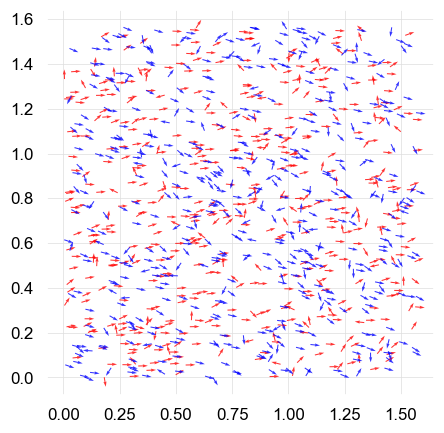

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
class1 = model.omegaValue > 0
class2 = model.omegaValue < 0

positionX, phaseTheta = model.positionX, model.phaseTheta
# model.positionX = positionX
# model.phaseTheta = phaseTheta

ax.quiver(
    positionX[class1, 0], positionX[class1, 1],
    np.cos(phaseTheta[class1]), np.sin(phaseTheta[class1]), color='red', alpha=0.8
)
ax.quiver(
    positionX[class2, 0], positionX[class2, 1],
    np.cos(phaseTheta[class2]), np.sin(phaseTheta[class2]), color='blue', alpha=0.8
)